In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_dublin_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Dublin')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/dublin_{date}.csv',index=False)
get_listings_dublin_timeseries()

In [4]:
# pull in detailed_listings
raw_df_dublin = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_dublin)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(dublin_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 6976 AirBnb listings.


In [5]:
dublin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2020-12.csv')
dublin_raw_df_12_12_2020.shape





(7894, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for dublin
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_dublin = glob.glob('dublin/**.csv')
files_dublin

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['dublin/Dublin_2021-11.csv',
 'dublin/Dublin_2021-10.csv',
 'dublin/Dublin_2021-04.csv',
 'dublin/Dublin_2021-06.csv',
 'dublin/Dublin_2021-07.csv',
 'dublin/Dublin_2021-03.csv',
 'dublin/Dublin_2021-02.csv',
 'dublin/Dublin_2021-01.csv',
 'dublin/Dublin_2021-09.csv',
 'dublin/Dublin_2021-08.csv',
 'dublin/Dublin_2020-12.csv']

In [7]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

dublin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(dublin_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(dublin_raw_df_12_12_2020['price'].mean(),2)}.")

dublin_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(dublin_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_1_9_2021['price'].mean(),2)}.")

dublin_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(dublin_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_2_8_2021['price'].mean(),2)}.")

dublin_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(dublin_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_3_4_2021['price'].mean(),2)}.")

dublin_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(dublin_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_4_9_2021['price'].mean(),2)}.")

#dublin_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(dublin_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_5_19_2021['price'].mean(),2)}.")

dublin_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(dublin_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_6_3_2021['price'].mean(),2)}.")

dublin_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(dublin_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_7_4_2021['price'].mean(),2)}.")

dublin_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(dublin_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_8_6_2021['price'].mean(),2)}.")

dublin_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(dublin_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_9_7_2021['price'].mean(),2)}.")

dublin_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(dublin_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_10_6_2021['price'].mean(),2)}.")

#dublin_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/dublin/dublin_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(dublin_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(dublin_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 7894 AirBnb listings; the avg price is €274.95.
The 1_9_2021 dataset contains 7831 AirBnb listings; the avg price is €275.96.
The 2_8_2021 dataset contains 7712 AirBnb listings; the avg price is €277.61.
The 3_4_2021 dataset contains 7598 AirBnb listings; the avg price is €281.69.
The 4_9_2021 dataset contains 7622 AirBnb listings; the avg price is €283.0.
The 6_3_2021 dataset contains 7607 AirBnb listings; the avg price is €272.6.
The 7_4_2021 dataset contains 7740 AirBnb listings; the avg price is €270.2.
The 8_6_2021 dataset contains 7554 AirBnb listings; the avg price is €275.06.
The 9_7_2021 dataset contains 7256 AirBnb listings; the avg price is €294.91.
The 10_6_2021 dataset contains 7068 AirBnb listings; the avg price is €301.72.


In [8]:
df_list_dublin = [dublin_raw_df_12_12_2020, dublin_raw_df_1_9_2021, dublin_raw_df_2_8_2021,
           dublin_raw_df_3_4_2021, dublin_raw_df_4_9_2021, dublin_raw_df_6_3_2021, dublin_raw_df_7_4_2021,
           dublin_raw_df_8_6_2021, dublin_raw_df_9_7_2021, dublin_raw_df_10_6_2021]

dates_dublin = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_dublin = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_dublin = []

def airbnb_parse_dublin(df_list, files):
    for file in files_dublin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/dublin/dublin_{file}.csv")
        print(f"The {file} dublin dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_dublin(df_list, dates):
    for file in files_dublin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/dublin/dublin_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_dublin.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_dublin)

dublin_parse = airbnb_parse_dublin(df_list_dublin, files_dublin)


The 2020-12 dublin dataset contains 7894 AirBnb listings -- the avg price is €274.95.
The 2021-01 dublin dataset contains 7831 AirBnb listings -- the avg price is €275.96.
The 2021-02 dublin dataset contains 7712 AirBnb listings -- the avg price is €277.61.
The 2021-03 dublin dataset contains 7598 AirBnb listings -- the avg price is €281.69.
The 2021-04 dublin dataset contains 7622 AirBnb listings -- the avg price is €283.0.
The 2021-06 dublin dataset contains 7607 AirBnb listings -- the avg price is €272.6.
The 2021-07 dublin dataset contains 7740 AirBnb listings -- the avg price is €270.2.
The 2021-08 dublin dataset contains 7554 AirBnb listings -- the avg price is €275.06.
The 2021-09 dublin dataset contains 7256 AirBnb listings -- the avg price is €294.91.
The 2021-10 dublin dataset contains 7068 AirBnb listings -- the avg price is €301.72.


In [9]:
dublin_summary = airbnb_to_frame_dublin(df_list_dublin, files_dublin)
dublin_summary['Date of scrape'] = pd.to_datetime(dublin_summary['Date of scrape'])
dublin_summary['City'] = 'dublin'
dublin_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,7894,274.95,80.0,0,1173721,1.03,dublin
1,2021-01-01,7831,275.96,80.0,0,1173721,1.02,dublin
2,2021-02-01,7712,277.61,80.0,0,1173721,1.00,dublin
3,2021-03-01,7598,281.69,80.0,0,1173721,0.96,dublin
4,2021-04-01,7622,283.00,79.0,0,1173721,0.93,dublin
5,2021-06-01,7607,272.60,80.0,0,1173721,0.97,dublin
6,2021-07-01,7740,270.20,80.0,0,1173721,0.97,dublin
7,2021-08-01,7554,275.06,80.0,0,1173721,1.01,dublin
8,2021-09-01,7256,294.91,81.0,0,1173721,1.17,dublin
9,2021-10-01,7068,301.72,85.0,9,1173721,1.18,dublin


In [10]:
master_df_dublin = pd.concat(df_list_dublin)
master_df_dublin_unique = master_df_dublin.drop_duplicates(subset='id')
master_df_dublin_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,1.91,3,0,NaN,NaN
1,68483,Unique Central Dublin River-view,339817,John,NaN,Dublin City,53.34501,-6.26552,Entire home/apt,92,3,103,2019-08-12,0.87,1,43,NaN,NaN
2,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.05,1,348,NaN,NaN
3,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,51,3,182,2020-03-09,1.56,3,114,NaN,NaN
4,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,0.95,3,0,NaN,NaN


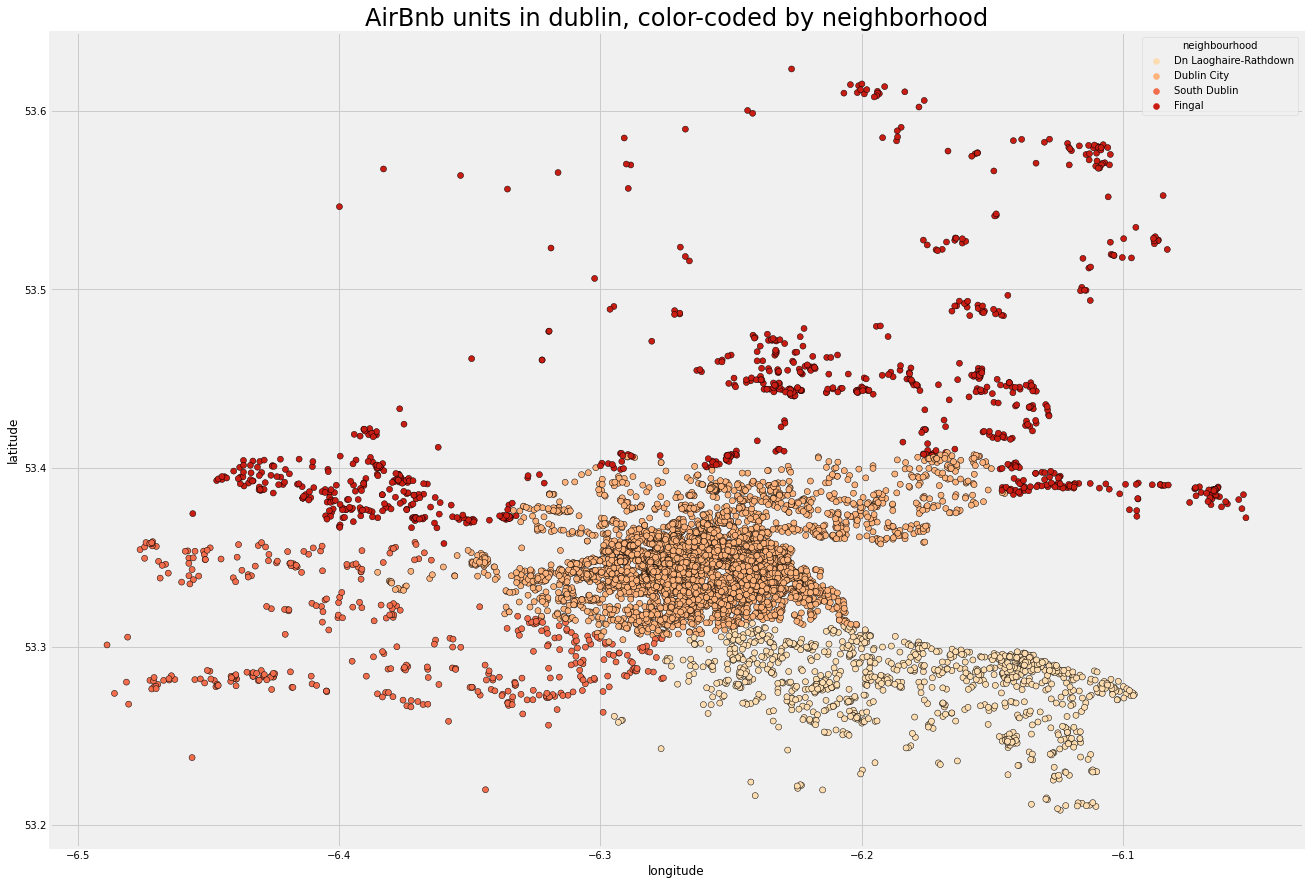

In [11]:
title = 'AirBnb units in dublin, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_dublin_unique.longitude, master_df_dublin_unique.latitude, hue = master_df_dublin_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_dublin.png')
plt.show()

## Add review data through a join

In [12]:
df_reviews = pd.concat([dublin_raw_df_10_6_2021,raw_df_dublin],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.291780,-6.257920,Private room,65,...,4.82,4.72,4.92,4.92,4.66,4.82,f,0.0,3.0,0.0
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.298850,-6.318500,Private room,30,...,NaN,NaN,NaN,NaN,NaN,NaN,f,0.0,1.0,0.0
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.292090,-6.256240,Private room,63,...,4.85,4.72,4.88,4.88,4.66,4.80,f,0.0,3.0,0.0
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.390270,-6.235470,Private room,45,...,4.76,4.72,4.85,4.90,4.62,4.74,t,0.0,3.0,0.0
4,162809,5.5 miles south of Dublin City :^),777681,Robert,NaN,Dn Laoghaire-Rathdown,53.283260,-6.191880,Private room,65,...,4.87,4.84,4.94,4.97,4.77,4.84,f,0.0,2.0,0.0
5,165828,Pádraig Pearse apt. Kilmainham,790601,Grainne,NaN,Dublin City,53.337440,-6.323630,Entire home/apt,100,...,4.86,4.68,4.78,4.72,4.30,4.46,f,5.0,0.0,0.0
6,165829,"The ""Michael Collins"" apartment",790601,Grainne,NaN,Dublin City,53.337440,-6.323630,Entire home/apt,100,...,4.80,4.80,4.74,4.67,4.40,4.63,f,5.0,0.0,0.0
7,178860,Georgian House in Heart of City Ctr,856312,Danielle,NaN,Dublin City,53.332810,-6.267500,Private room,80,...,4.94,4.88,4.95,4.96,4.94,4.84,f,1.0,1.0,0.0
8,237465,Cozy 1 bed apt 10 mins to airport. total privacy,1245198,Amanda,NaN,Dublin City,53.395580,-6.175240,Entire home/apt,60,...,4.72,4.56,4.81,4.78,4.32,4.64,f,3.0,0.0,0.0
9,245893,Double warm cosy bedroom in Lucan,1289720,Sheila,NaN,South Dublin,53.344710,-6.416020,Private room,45,...,5.00,4.75,4.88,4.94,4.44,4.81,f,0.0,2.0,0.0


## Regression

In [13]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -504.42643244486095
Coefficients:  [   7.76763492  -54.38817129  -64.56040508   -3.54945397   93.42761097
   36.09885341  207.975471   -155.62269649   48.67448773]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
5093,331,-1022.569357,-1353.569357
5389,95,-1147.537574,-1242.537574
4493,245,-909.769556,-1154.769556
526,75,-974.716031,-1049.716031
2951,119,-896.657934,-1015.657934


<function matplotlib.pyplot.ylim(*args, **kwargs)>

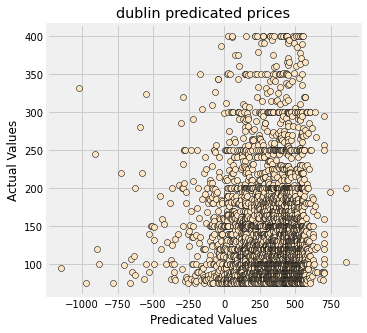

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicated Values')
plt.ylabel('Actual Values')
plt.title('dublin predicated prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim